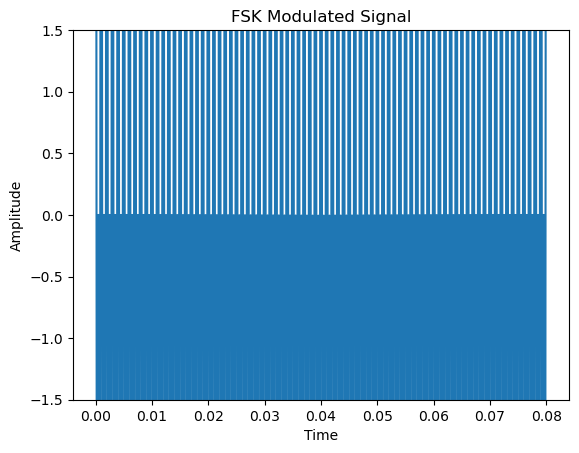

Demodulated bits: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fsk_modulate(bits, carrier_frequencies, symbol_rate, amplitude):
    t = np.linspace(0, len(bits) / symbol_rate, len(bits) * 1000)
    signal = np.zeros_like(t)
    
    for i, bit in enumerate(bits):
        frequency = carrier_frequencies[bit]
        signal += amplitude * np.cos(2 * np.pi * frequency * t)
    
    return signal

def fsk_demodulate(signal, carrier_frequencies, symbol_rate):
    t = np.linspace(0, len(signal) / symbol_rate, len(signal))
    demodulated_bits = []
    
    for i in range(len(t)):
        bit_magnitude = []
        for freq in carrier_frequencies:
            bit_magnitude.append(np.abs(signal[i] * np.cos(2 * np.pi * freq * t[i])))
        
        bit = np.argmax(bit_magnitude)
        demodulated_bits.append(bit)
    
    return demodulated_bits

def plot_signal(signal, time, title):
    plt.plot(time, signal)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.ylim([-1.5, 1.5])  # Adjust the y-axis limits if needed
    plt.show()

# Example usage
bits = [1, 0, 1, 1, 0, 1, 0, 0]  # Replace with your own bit sequence
carrier_frequencies = [1000, 2000]  # Replace with the desired carrier frequencies in Hz
symbol_rate = 100  # Replace with the desired symbol rate in symbols per second
amplitude = 1  # Replace with the desired amplitude

# Modulation
modulated_signal = fsk_modulate(bits, carrier_frequencies, symbol_rate, amplitude)
time = np.linspace(0, len(bits) / symbol_rate, len(modulated_signal))
plot_signal(modulated_signal, time, 'FSK Modulated Signal')

# Demodulation
demodulated_bits = fsk_demodulate(modulated_signal, carrier_frequencies, symbol_rate)
print("Demodulated bits:", demodulated_bits)
